In [1]:
from matplotlib.pyplot import *
import numpy as np
import math
import pandas as pd
import datetime
import random

In [2]:
def draw_curve(x,y):
    plot(x,y)

In [3]:
def draw_scatter(x,y):
    scatter(x,y)

In [4]:
def draw_bar(x,h):
    bar(x,h)

In [5]:
def draw_mean_std_bar(label,data):
    mean = np.mean(data,axis=1)
    std = np.std(data,axis=1)
    bar(label,mean,yerr=std)

In [6]:
def draw_hist(x,y):
    hist(y,bins=x)

In [7]:
def draw_boxplot(m):
    fig = figure(1, figsize=(25, 15))
    ax = fig.add_subplot(222)
    ax.boxplot(m.transpose())

In [8]:
def draw_violinplot(data):
    violinplot(data.transpose())

In [9]:
def draw_Bubble_chart(x,y,s):
    scatter(x,y,s)

In [10]:
def read_data(filename = None):
    if filename is None:
        return pd.read_csv('./data/clean/01. Duc/2018-01-25 11:20:00.csv.gz',compression='gzip', sep=';')

In [11]:
# Create dataframes per day during a week
import datetime
import random
df = read_data()
days = np.array([datetime.datetime(2018,1,29,0,0,0) + datetime.timedelta(days=i) for i in range(9)])
firstDay = datetime.datetime(2018,1,29,0,0,0)

dataframe_per_day = []

names_days = np.array(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])

for day in days[1:]:
    df_j = df[df.Timestamp <str(day)]
    df_j = df_j[ df_j.Timestamp >str(firstDay)]
    firstDay = day
    dataframe_per_day.append(df_j)

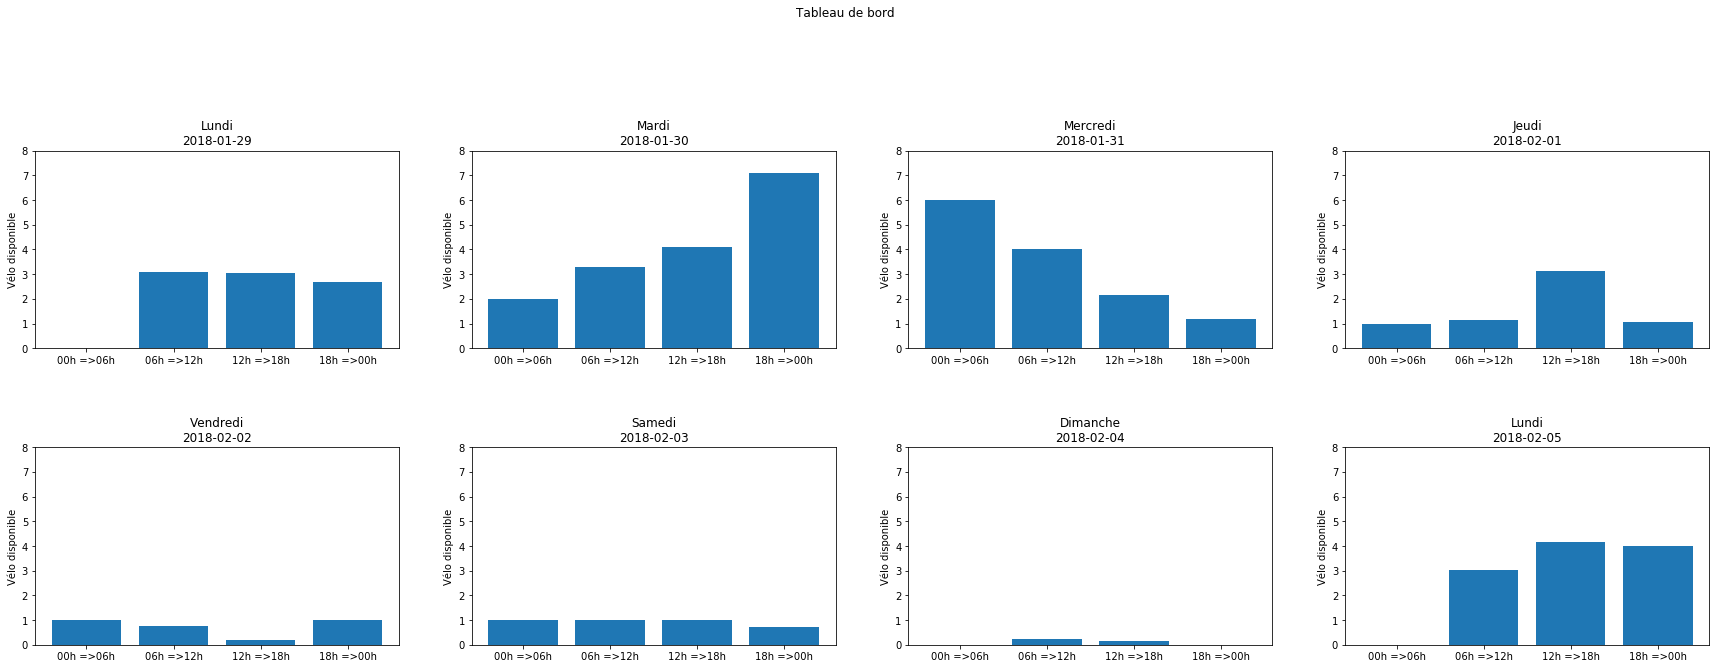

In [12]:
# create dataframe per period in day
figLayout = figure(constrained_layout=False,figsize=(30,20))
gs = figLayout.add_gridspec(4, 4)

gcf().subplots_adjust(hspace = .5)
figLayout.suptitle("Tableau de bord")

for index,df_day in enumerate(dataframe_per_day):

    title = df_day.Timestamp.iloc[0].split()[0]
    
    year = int(df_day.Timestamp.iloc[0].split()[0].split('-')[0])
    month = int(df_day.Timestamp.iloc[0].split()[0].split('-')[1])
    day = int(df_day.Timestamp.iloc[0].split()[0].split('-')[2])

    hours = np.array([datetime.datetime(year,month,day,0,0,0) + datetime.timedelta(hours=i*6) for i in range(5)])
    dataframe_per_period = []

    x = []
    y = []
    for i in range(len(hours)-1):

        x.append(str(hours[i]).split()[1].split(':')[0]+"h =>"+str(hours[i+1]).split()[1].split(':')[0]+"h")

        df_p = df_day[df_day.Timestamp <str(hours[i+1])]
        df_p = df_p[ df_p.Timestamp >str(hours[i])]
        y.append(df_p.Bikes.mean())
        dataframe_per_period.append(df_p)
    
    
    
    fig_ax = figLayout.add_subplot(gs[index//4, index%4])
    #axes[index//4][index%4]
    fig_ax.bar(x, y)
    ylim(bottom=0,top=df.Bikes.max()) 
    #axes[index//4][index%4]
    fig_ax.set_title(names_days[index%7]+"\n"+title)
    #axes[index//4][index%4]
    fig_ax.set_ylabel("Vélo disponible")

In [13]:
data = df.groupby(['TemperatureTemp','Humidity']).mean().Bikes
data = data.reset_index(level=[0,1])
x = data.TemperatureTemp
y = data.Humidity
z = np.around(data.Bikes)


z = z*50 + 1

fig_ax2 = figLayout.add_subplot(gs[2:4,0:-2])
#axes[index//4][index%4]



scatter = fig_ax2.scatter(x,y,s=z,label='Moyenne des vélos disponibles',alpha=0.3)# ax.scatter(x, y, c=color, s=scale, label=color,alpha=0.3, edgecolors='none')
fig_ax2.legend( loc="lower left",)


fig_ax2.set_ylabel("Humidity")
fig_ax2.set_xlabel("TemperatureTemp")



figLayout.savefig('test.png', dpi=100)


In [14]:
df


,Timestamp,Station,Bikes,Slots,Total,Status,Humidity,Pressure,Rain,WindDeg,WindSpeed,Snow,TemperatureTemp
0,2018-01-25 11:20:00,01. Duc,3,5,8,Mist,81.0,1028.0,{},240,1.5,{},5.70
1,2018-01-25 11:30:00,01. Duc,3,5,8,Mist,81.0,1028.0,{},240,1.5,{},5.69
2,2018-01-25 11:40:00,01. Duc,3,5,8,Mist,81.0,1028.0,{},240,1.5,{},5.69
3,2018-01-25 11:50:00,01. Duc,3,5,8,Mist,81.0,1028.0,{},240,1.5,{},6.64
4,2018-01-25 12:00:00,01. Duc,3,5,8,Mist,81.0,1028.0,{},240,1.5,{},5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,2018-03-09 11:50:00,01. Duc,2,6,8,Clear,62.0,1016.0,{},None,1.5,{},11.21
6196,2018-03-09 12:00:00,01. Duc,2,6,8,Clear,62.0,1016.0,{},None,1.5,{},11.20
6197,2018-03-09 12:10:00,01. Duc,2,6,8,Clear,62.0,1016.0,{},None,1.5,{},11.20
6198,2018-03-09 12:20:00,01. Duc,2,6,8,Clear,62.0,1016.0,{},None,1.5,{},11.19


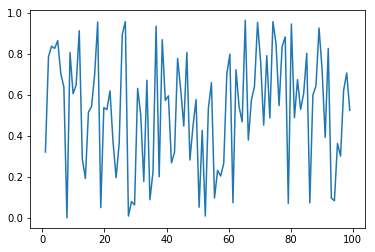

In [15]:
x = np.linspace(1,99,100)
y = np.random.rand(100,1)
draw_curve(x,y)
show()

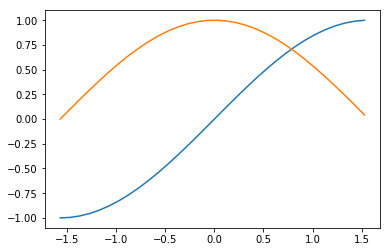

In [16]:
x = np.arange(-math.pi/2,math.pi/2,.1)
f_sin = np.vectorize(math.sin)
f_cos = np.vectorize(math.cos)
draw_curve(x,f_sin(x))
draw_curve(x,f_cos(x))
show()

In [17]:
x = np.random.rand(250)
y = np.random.rand(250)
draw_scatter(x,y)

TypeError: 'PathCollection' object is not callable

In [ ]:
x = np.arange(1,11)
h = np.random.randint(low=1,high=25,size=10)
draw_bar(x,h)

In [ ]:
x = np.array(['A','B','C','D','E','F','G','H','I','J'])
#h = np.random.randint(low=1,high=25,size=10)
draw_bar(x,h)

In [ ]:
n = 5
m = 10
data = np.random.randint(low=1,high=50,size=(n,m))
label = np.array(['A','B','C','D','E'])
draw_mean_std_bar(label,data)

In [ ]:
data = np.random.randint(low=0,high=50,size=100)
bins = np.arange(0,51,5)
draw_hist(bins,data)

In [ ]:
data = np.random.randint(low=0,high=50,size=(10,5))
draw_boxplot(data)

In [ ]:
draw_violinplot(data)

In [ ]:
x = np.random.rand(100)
y = np.random.rand(100)
s = np.arange(100,1000)
draw_Bubble_chart(x,y,s)